In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9a4382c1ec65bc1fed1f3ce1f7a879a5


In [4]:

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Start the call counter 
record = 0
set_number = 1
skip = 0
# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:
    if (record > 0) and ((record % 50) == 0):
        print("Taking break", time.time())
        time.sleep(1.01)
        set_number += 1
        record += 1
    else:

        try: 
            response = requests.get(f"{url}&q={city}").json() 
            city_name.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            max_temp.append(response["main"]["temp_max"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            wind_speed.append(response["wind"]["speed"])
            city_record = response["name"]
            print(f"Processing Record {record:03d} of Set {set_number:02d} | {city_record}")
            record += 1
        
        # If no record found "skip" to next call
        except:
            print("City not found. Skipping...")
            skip += 1


Beginning Data Retrieval
-------------------------------
Processing Record 000 of Set 01 | New Milford
Processing Record 001 of Set 01 | Dikson
Processing Record 002 of Set 01 | Maple Creek
Processing Record 003 of Set 01 | Cidreira
Processing Record 004 of Set 01 | Fortuna
Processing Record 005 of Set 01 | Mataura
Processing Record 006 of Set 01 | George Town
Processing Record 007 of Set 01 | Nikolskoye
Processing Record 008 of Set 01 | Hilo
Processing Record 009 of Set 01 | Kachīry
Processing Record 010 of Set 01 | Matara
Processing Record 011 of Set 01 | Hermanus
City not found. Skipping...
Processing Record 012 of Set 01 | Tilichiki
Processing Record 013 of Set 01 | Rikitea
Processing Record 014 of Set 01 | Busselton
Processing Record 015 of Set 01 | Kendari
Processing Record 016 of Set 01 | Dingle
Processing Record 017 of Set 01 | Miguel Pereira
Processing Record 018 of Set 01 | Imeni Babushkina
Processing Record 019 of Set 01 | Kaitangata
Processing Record 020 of Set 01 | Puerto 

In [5]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

weather_df = pd.DataFrame(weather_dict)
weather_df.sort_values(by=['City'])
weather_df.reset_index(drop=True)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,New Milford,75,US,1661232703,92,40.9327,-74.0179,75.18,4.61
1,Dikson,100,RU,1661232704,94,73.5069,80.5464,42.13,6.71
2,Maple Creek,2,CA,1661232632,64,49.9168,-109.4848,72.01,10.36
3,Cidreira,3,BR,1661232704,92,-30.1811,-50.2056,59.31,13.91
4,Fortuna,99,US,1661232584,92,40.5982,-124.1573,63.66,1.01
...,...,...,...,...,...,...,...,...,...
562,Cururupu,97,BR,1661232942,93,-1.8283,-44.8683,73.02,3.11
563,Sand,0,DE,1661232942,77,50.0000,10.6000,58.75,2.84
564,Malbork,38,PL,1661232942,85,54.0359,19.0266,70.12,3.62
565,Amahai,83,ID,1661232943,84,-3.3333,128.9167,79.56,7.76


In [6]:
# save data frame
weather_df.to_csv('output_data/cities.csv')

In [7]:
modified_weather_df = weather_df.describe()
modified_weather_df

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,567.000000,5.670000e+02,567.000000,567.000000,567.000000,567.000000,567.000000
mean,54.671958,1.661233e+09,70.541446,21.592485,13.222403,68.425644,8.295820
std,39.400835,8.916393e+01,21.666961,33.640611,90.986586,13.647278,6.214828
min,0.000000,1.661232e+09,8.000000,-54.800000,-179.166700,29.530000,0.000000
25%,13.000000,1.661233e+09,57.500000,-5.259000,-67.175650,58.415000,4.130000
50%,63.000000,1.661233e+09,75.000000,27.850000,18.733300,70.120000,6.910000
75%,96.000000,1.661233e+09,88.000000,50.596500,90.481000,78.280000,11.430000
max,100.000000,1.661233e+09,100.000000,78.218600,178.416700,103.600000,49.390000


In [8]:
# data frame no cities having Humidity over 100
clean_weather_df = weather_df.loc[(weather_df['Humidity'] < 100), :]
clean_weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000
mean,54.717117,1.661233e+09,69.904505,21.371615,13.735043,68.496883,8.392270
std,39.361891,8.901870e+01,21.457453,33.737808,91.631387,13.700173,6.232056
min,0.000000,1.661232e+09,8.000000,-54.800000,-179.166700,29.530000,0.000000
25%,13.000000,1.661233e+09,57.000000,-5.400000,-67.534600,58.415000,4.230000
50%,63.000000,1.661233e+09,75.000000,26.729200,18.957000,70.200000,6.930000
75%,96.000000,1.661233e+09,87.500000,50.596500,92.346700,78.630000,11.500000
max,100.000000,1.661233e+09,99.000000,78.218600,178.416700,103.600000,49.390000


In [9]:
weather_df_H_over100 = weather_df.loc[(weather_df['Humidity'] > 100), :]
weather_df_H_over100

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


# Latitude vs. Temperature Plot

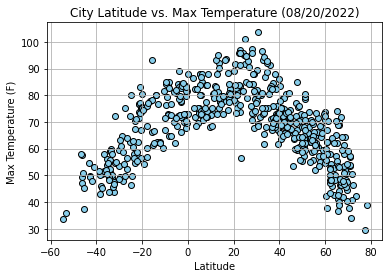

In [10]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Max Temp'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Max Temperature (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("output_data/Latitude vs Temp.png")

plt.show()

#  Latitude vs. Humidity Plot

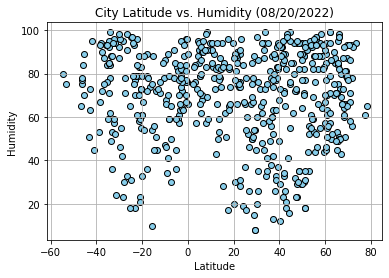

In [11]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Humidity'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Humidity (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.savefig("output_data/Latitude vs Humidity.png")

plt.show()

#  Latitude vs. Wind Speed Plot

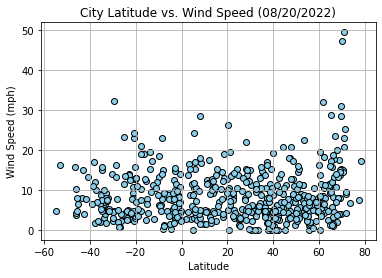

In [12]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Wind Speed'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Wind Speed (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output_data/Latitude vs Wind Speed.png")

plt.show()

In [13]:
north_hemispheres = weather_df.loc[(weather_df["Lat"] >= 0), :]
south_hemispheres = weather_df.loc[(weather_df["Lat"] < 0), :]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.739770702226661


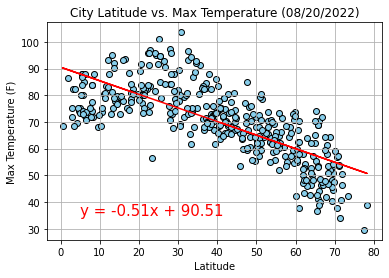

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemispheres["Lat"], north_hemispheres['Max Temp'])
regress_values = (north_hemispheres["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(north_hemispheres["Lat"], north_hemispheres['Max Temp'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Max Temperature (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
                                                           
plt.plot(north_hemispheres["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5, 35), fontsize = 15, color = "red")

plt.savefig("output_data/Northern Hemisphere - Temperature (F) vs Latitude.png")

plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8008980143319444


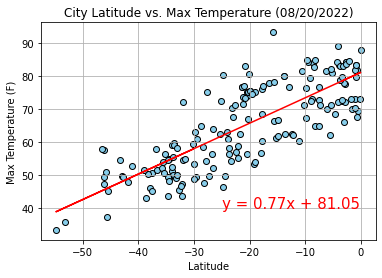

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemispheres["Lat"], south_hemispheres['Max Temp'])
regress_values = (south_hemispheres["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(south_hemispheres["Lat"], south_hemispheres['Max Temp'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Max Temperature (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
                                                           
plt.plot(south_hemispheres["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25, 40), fontsize = 15, color = "red")

plt.savefig("output_data/Southern Hemisphere - Temperature (F) vs Latitude.png")

plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.012984432111871103


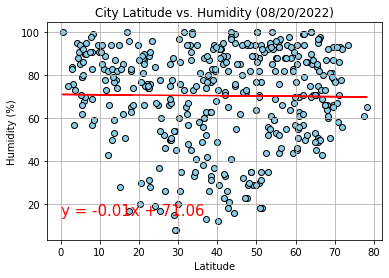

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemispheres["Lat"], north_hemispheres['Humidity'])
regress_values = (north_hemispheres["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(north_hemispheres["Lat"], north_hemispheres['Humidity'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Humidity (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
                                                           
plt.plot(north_hemispheres["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 15), fontsize = 15, color = "red")

plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs Latitude.png")

plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0632817752009012


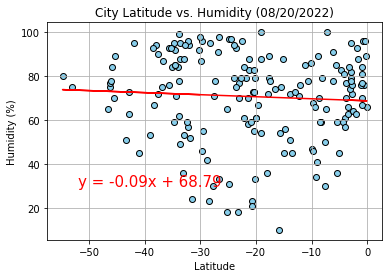

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemispheres["Lat"], south_hemispheres['Humidity'])
regress_values = (south_hemispheres["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(south_hemispheres["Lat"], south_hemispheres['Humidity'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Humidity (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
                                                           
plt.plot(south_hemispheres["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-52, 30), fontsize = 15, color = "red")

plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs Latitude.png")

plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06404135477868796


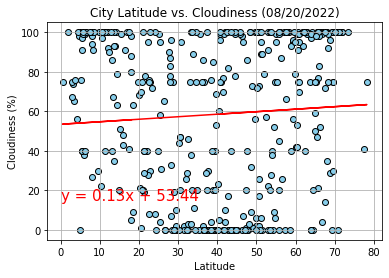

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemispheres["Lat"], north_hemispheres['Cloudiness'])
regress_values = (north_hemispheres["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(north_hemispheres["Lat"], north_hemispheres['Cloudiness'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Cloudiness (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
                                                           
plt.plot(north_hemispheres["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 15), fontsize = 15, color = "red")

plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs Latitude.png")

plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11743369511541803


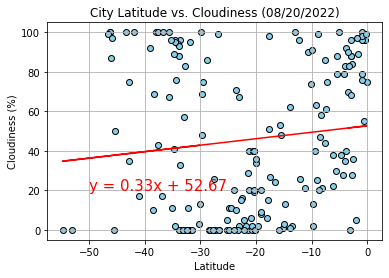

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemispheres["Lat"], south_hemispheres['Cloudiness'])
regress_values = (south_hemispheres["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(south_hemispheres["Lat"], south_hemispheres['Cloudiness'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Cloudiness (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
                                                           
plt.plot(south_hemispheres["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize = 15, color = "red")

plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs Latitude.png")

plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10953816647417003


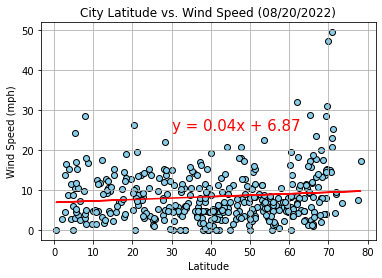

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemispheres["Lat"], north_hemispheres['Wind Speed'])
regress_values = (north_hemispheres["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(north_hemispheres["Lat"], north_hemispheres['Wind Speed'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Wind Speed (08/20/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
                                                           
plt.plot(north_hemispheres["Lat"], regress_values, "r-")
plt.annotate(line_eq, (30,25), fontsize = 15, color = "red")

plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs Latitude.png")

plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.023999878791562953


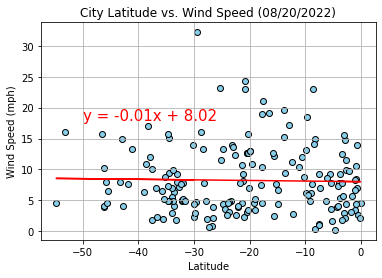

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemispheres["Lat"], south_hemispheres['Wind Speed'])
regress_values = (south_hemispheres["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(south_hemispheres["Lat"], south_hemispheres['Wind Speed'], marker = "o", facecolors = "skyblue", edgecolors = "black")

plt.title("City Latitude vs. Wind Speed (08/22/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
                                                           
plt.plot(south_hemispheres["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50,18), fontsize = 15, color = "red")

plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs Latitude.png")

plt.show()